# Supervised Learning

It provides a set of models/algortihms for predicting or infering a target random variable $Y\in\mathcal{Y}$ based on a set of random features $(X_1,\ldots, X_p)\in\mathcal{X}\subseteq\mathbb{R}^p$, $p\in\mathbb{N}$, by using an observed (empirical) data set $\mathcal{D}=\{(\mathbf{\boldsymbol{x}}_i, y_i)|i=1,\ldots,n\}$.

Types of problems:

* **Classification:** $\mathcal{Y}$ is finite set, $\mathcal{Y}=\{1,\ldots,K\}$, $K\geq 2$
* **Regression:** $\mathcal{Y}$ is continuous, $\mathcal{Y}=\mathbb{R}$

Terminology:

* $\mathcal{D}=\{(\mathbf{\boldsymbol{x}}_i, y_i)|i=1,\ldots,n\}$ is called the *learning data set*.
    * $\mathcal{D}$ can be a set of $n$ independent identically distributed (i.i.d.) replications of $(\boldsymbol{X}, Y)\sim \mathbb{P}(\boldsymbol{X}, Y)$
    * $\mathcal{D}$ can be a set of $n$ not independent (or dependent) identically distributed (ni.i.d.) replications of $(\boldsymbol{X}, Y)\sim \mathbb{P}(\boldsymbol{X}, Y)$.


* $y$ is the observed *output*, *response*, *dependent*, *target* or *label variable*.
* $\mathbf{\boldsymbol{x}}$ is the  vector of observed *inputs*, *predictors*, *explanatory variables*, *covariables*, *regressors*, *independent variables*, *features*, or *attributes*.
* $i=1,\ldots,n$ is the set of *observations*, *units*, *copies*, *instances*, *samples*, or *examples*.

## Supervised Learning in Context

Assume there is some relationship between the target $Y\in\mathcal{Y}$ and the set of features $\mathbf{\boldsymbol{X}} = (X_1,\ldots,X_p)\in\mathcal{X}$, given by

$$Y = f(\mathbf{\boldsymbol{X}}) + \varepsilon,$$

where $f:\mathcal{X}\to\mathcal{Y}$ is a **_unknown_** function, and $\varepsilon$ a zero-mean error independent of $\boldsymbol{X}$.

Supervised Learning refers to a set of tools to learn (estimate or approximate) the function $f$ by using $\mathcal{D}$.

Based on $\mathcal{D}$, the reasons for learning $f$ could be:
* Inference: understand which features affect the target, and how
* Prediction: predict accurately the unseen test cases
* Evaluate the quality of predictions and inferences

## Supervised Learning Methods

* **Parametric:** reduces the problem of learning $f$ to one of learning a finite set of unknown parameters $\mathbf{\boldsymbol{\theta}}\in\mathbf{\boldsymbol{\Theta}}\subseteq\mathbb{R}^p$ (finite-dimensional models).
* **Nonparametric:** avoids restrictive assumptions of the functional form of $f$ (infinite-dimensional models).
* **Semiparametric:** combines parametric and nonparametric approaches keeping the interpretability of the former and the flexibility of the latter.

## Accuracy

Let $\hat{f}_\mathcal{D}$ be a learned model by applying some supervised method on $\mathcal{D}$.

The accuracy of predictions $\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{x}})$ is measured by using a **_loss function_**

$$ L:\mathcal{Y}\times\mathcal{Y}\to\mathbb{R}_+,$$

which measures the discrepancy between predictions and true outcomes.

* Some popular loss functions for regression:
    
    * *Squared loss*:
    
    $$ L\left(Y,\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{X}})\right)=\left(Y-\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{X}})\right)^2 $$
    
    * *Absolute loss*:
    
    $$ L\left(Y,\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{X}})\right)=|Y-\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{X}})|$$

* Some loss functions for classification:
    
    * *0-1 loss*:
    
    $$ L\left(Y,\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{X}})\right)=I\left(Y\neq\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{X}})\right)=\begin{cases}
    1& Y\neq\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{X}})\\
    0& \mathrm{otherwise}.
    \end{cases}$$
    
    * *Log-likelihood (cross-entropy or deviance) loss*:
    
    $$L\left(Y,\hat{\mathbb{P}}_\mathcal{D}(\mathbf{\boldsymbol{X}})\right)=-2\cdot\log\hat{\mathbb{P}}_G(\mathbf{\boldsymbol{X}}).$$

## Errors

* **_Test_** (also **_generalization_**) **_error_** on future data $(\mathbf{\boldsymbol{X}},Y)\sim\mathbb{P}(\boldsymbol{X},Y)$

$$\mathrm{Err}\left(\hat{f}_\mathcal{D}\right)=\mathbb{E}_{\boldsymbol{X},Y}\left[L\left( Y,\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{X}})\right)\right] =\mathbb{E}_{\boldsymbol{X}}\left[\mathbb{E}_{Y|\boldsymbol{X}}\left[L\left( Y,\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{X}})\right)\right]\right],$$

which is not observed due to $(\mathbf{\boldsymbol{X}},Y)$ is unknown.

* **_Expected generalization_** (also **_prediction_**) **_error_** over $\mathcal{D}$
    
    $$\mathrm{Err}=\mathbb{E}_\mathcal{D}\left[\mathrm{Err}\left(\hat{f}_\mathcal{D}\right)\right] = \mathbb{E}\left[L\left( Y,\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{X}})\right) \right]$$

* **_Training_** (also **_apparent_**) **_error_**

$$\overline{\mathrm{err}}=n^{-1}\sum_{i=1}^{n}L\left(y_i,\hat{f}_\mathcal{D}(\boldsymbol{x}_i)\right),$$

which is not a good estimate of $\mathrm{Err}\left(\hat{f}_\mathcal{D}\right)$, due to $\overline{\mathrm{err}}<\mathrm{Err}\left(\hat{f}_\mathcal{D}\right)$.

## Bias-Variance Decomposition

Assuming a squared loss function, the Expected Prediction Error can be decomposed as

$$
\begin{split}
\mathrm{EPE}(\mathbf{\boldsymbol{x}}_0)
&=\mathbb{E}\left[\left(Y-\hat{f}_\mathcal{D}(\mathbf{\boldsymbol{x}}_0)\right)^2|\mathbf{\boldsymbol{X}}=\mathbf{\boldsymbol{x}}_0\right]\\
&=\left[\mathbb{E}\left(\hat{f}_\mathcal{D}(\boldsymbol{x}_0)\right)-f(\boldsymbol{x}_0)\right]^2+\mathbb{E}\left[\left(\hat{f}_\mathcal{D}(\boldsymbol{x}_0)-\mathbb{E}\left(\hat{f}_\mathcal{D}(\boldsymbol{x}_0)\right)\right)^2\right] +\mathbb{E}\left(\varepsilon^2\right)\\
&=\mathrm{Bias}^2\left(\hat{f}_\mathcal{D}(\boldsymbol{x}_0)\right)+\mathrm{Var}\left(\hat{f}_\mathcal{D}(\boldsymbol{x}_0)\right)+\mathrm{Var}(\varepsilon)\\
&=\underbrace{\mathrm{MSE}\left(\hat{f}_\mathcal{D}(\boldsymbol{x}_0)\right)}_\text{Reducible error} + \underbrace{\mathrm{Var}(\varepsilon)}_\text{Irreducible error}
\end{split}
$$


<img src='bias_variance_tradeoff.png' width='550' />

Source: Nielsen (2006). *Tree Boosting With XGBoost*, Department of Mathematical Sciences, Norwegian University of Science and Technology.

## *"Ni tanto que queme el santo, ni tampoco que no lo alumbre"*

# Inverse Problems and Regularization

* Let be the inverse problem

$$\text{Given }\ y\in\mathcal{Y},\ \text{ find }\ f\in\mathcal{F}\ \text{ such that }\  y=\mathcal{A}f,$$

with $\mathcal{A}$ is a known bounded operator between Hilbert spaces $\mathcal{F}$ and $\mathcal{Y}$.

* Solving the inverse problem requires the inversion of $\mathcal{A}$.
* A problem is called *well-posed (conditioned)* if satisfies the Hadamard criteria:
	1. There exists solution to the problem (existence),
	2. There is a unique solution to the problem (uniqueness),
	3. The solution depends continuously on the data (stability).


* A problem which is not well-posed is called *ill-posed*.
* Usually, the main issue is stability.
* In statistics, ill-posed problems involves random errors, $\varepsilon$, in the data

$$y=\mathcal{A}f+\varepsilon.$$

### Some examples

**Example 1:** The *linear regresion* model

$$y_i= \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} + \varepsilon_i,\quad i=1,\ldots,n,$$

where $\varepsilon_i\sim \mathrm{iid}(0,\sigma^2)$ and independent of each $x_{ij}$, $j=1,\ldots,p$.

* In matrix notation
$$
\begin{split}
\begin{pmatrix}
y_1\\
\vdots\\
y_n
\end{pmatrix}
&=\beta_0
\begin{pmatrix}
1\\
\vdots\\
1
\end{pmatrix}
+
\begin{pmatrix}
x_{1,1}&\cdots&x_{1,p}\\
\vdots&\ddots&\vdots\\
x_{n,1}&\cdots&x_{n,p}
\end{pmatrix}
\begin{pmatrix}
\beta_1\\
\vdots\\
\beta_p
\end{pmatrix}
+
\begin{pmatrix}
\varepsilon_1\\
\vdots\\
\varepsilon_n
\end{pmatrix}\\
\boldsymbol{y}
&= \beta_0 \boldsymbol{1} + \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon},
\end{split}
$$

where $\boldsymbol{\varepsilon}\sim (\boldsymbol{0},\sigma^2\boldsymbol{I}_p)$ and independent of each $\boldsymbol{x}_j$, $j=1,\ldots,p$.

* Given $\boldsymbol{y}$ and $\boldsymbol{X}$, the _Ordinary Least Squares_ (OLS) estimator of $\boldsymbol{\beta}$ is given by,

$$
\begin{split}
\widehat{\mathbf{\boldsymbol{\beta}}}^{\mathrm{ols}}
%&=\arg\min_\mathbf{\boldsymbol{\beta}} \frac{1}{n}\mathrm{RSS}(\mathbf{\boldsymbol{\beta}})\\
&=\arg\min_{\mathbf{\boldsymbol{\beta}}}\frac{1}{n}
\sum_{i=1}^{n}\varepsilon_i^{2}(\mathbf{\boldsymbol{\beta}}) \\
%&=\argmin_\mathbf{\boldsymbol{\beta}}\frac{1}{n}\sum_{i=1}^{n}(y_i-\mathbf{\boldsymbol{x}}_i^\top\mathbf{\boldsymbol{\beta}})^{2} \\
%&=\argmin_\mathbf{\boldsymbol{\beta}}\frac{1}{n}(\mathbf{\boldsymbol{y}}-\mathbf{\boldsymbol{X}}\mathbf{\boldsymbol{\beta}})^\top(\mathbf{\boldsymbol{y}}-\mathbf{\boldsymbol{X}}\mathbf{\boldsymbol{\beta}})\\
%&=\argmin_\mathbf{\boldsymbol{\beta}}\frac{1}{n}\lVert \mathbf{\boldsymbol{y}}-\mathbf{\boldsymbol{X}}\mathbf{\boldsymbol{\beta}} \rVert^{2}_2\\
&=\big(\mathbf{\boldsymbol{X}}^{\top}\mathbf{\boldsymbol{X}}\big)^{-1}\mathbf{\boldsymbol{X}}^{\top}\mathbf{\boldsymbol{y}},\quad \text{if }\  \mathrm{rank}(\mathbf{\boldsymbol{X}})=p,
\end{split}
$$

and $\widehat{\beta}_0=\bar{y}-\bar{\mathbf{\boldsymbol{x}}}^\top\widehat{\mathbf{\boldsymbol{\beta}}}^{\mathrm{ols}}$.


**Example 2:** The *polynomial regression* model of degree $m\in\mathbb{N}_0$,

$$y_i= \beta_0 + \beta_1 x_{i} + \beta_2 x_{i}^2 + \cdots + \beta_m x_{i}^m + \varepsilon_i,\quad i=1,\ldots,n,$$

where $\varepsilon_i\sim \mathrm{iid}(0,\sigma^2)$ and independent of each $x_{i}^j$, $j=1,\ldots,m$.

* In matrix notation
$$
\begin{split}
\begin{pmatrix}
y_1\\
\vdots\\
y_n
\end{pmatrix}
&=\beta_0
\begin{pmatrix}
1\\
\vdots\\
1
\end{pmatrix}
+
\begin{pmatrix}
x_{1}&\cdots&x_{1}^m\\
\vdots&\ddots&\vdots\\
x_{n}&\cdots&x_{n}^m
\end{pmatrix}
\begin{pmatrix}
\beta_1\\
\vdots\\
\beta_m
\end{pmatrix}
+
\begin{pmatrix}
\varepsilon_1\\
\vdots\\
\varepsilon_n
\end{pmatrix}\\
\boldsymbol{y}
&= \beta_0 \boldsymbol{1} + \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}
\end{split}
$$


* This model is linear in the parameters even though it is a nonlinear function of the feature x, thus it can be estimated by Ordinary Least Squares.

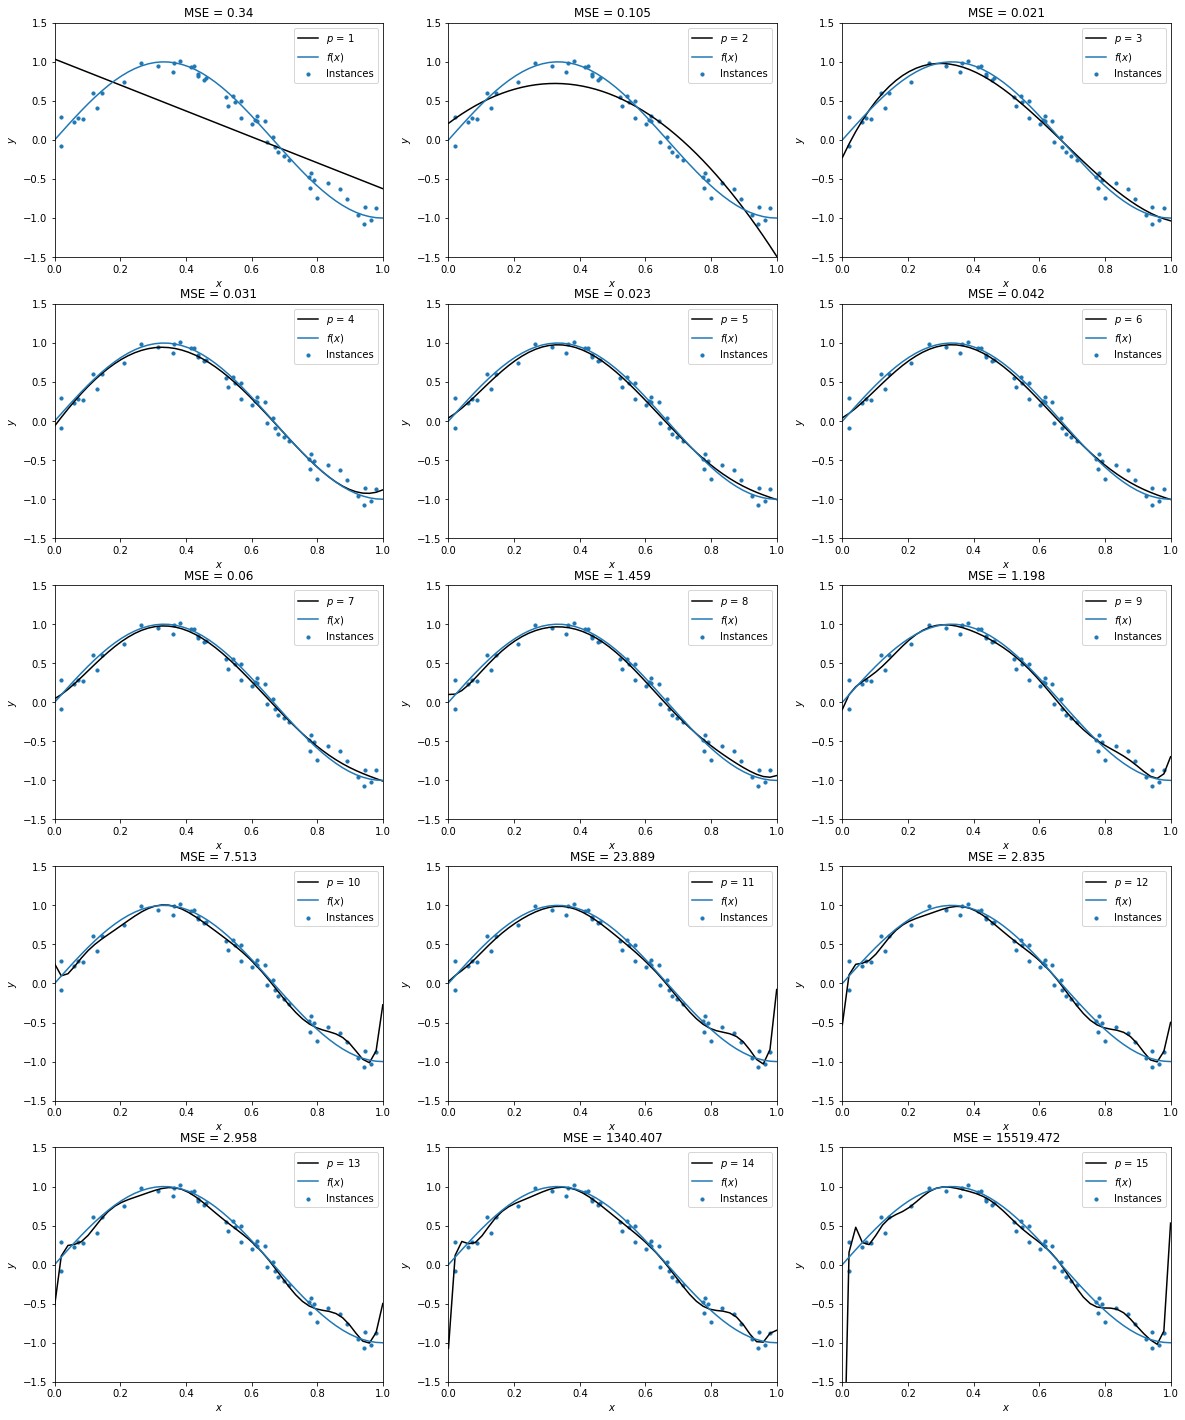

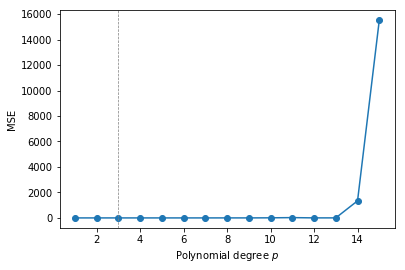

Estimated parameters: [ -0.22575455   8.92807827 -19.20280425   9.46518913]
Estimated parameters: [ -0.22575455   8.92807827 -19.20280425   9.46518913]
R2: 0.972


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# The true (nonlinear) function f(x)
def f(x):
    return np.sin(1.5 * np.pi * x)

# The true (linear) function f(x)
#def f(x):
#    return 1 + 0.7*x

np.random.seed(0)

n = 50                                  # number of instances
p = range(1, 16, 1)                     # polynomial degrees

x = np.sort(np.random.rand(n))          # the feature x ~ N(0,1)
y = f(x) + np.random.randn(n) * 0.1     # the target y (with noise N(0,1) * 0.1)

mse = []                                # object to save the mean square error
plt.figure(figsize=(20, 25))
for i in range(len(p)):
    ax = plt.subplot(5, 3, i + 1)
    #plt.setp(ax, xticks=(), yticks=())

    pipeline = Pipeline([('poly', PolynomialFeatures(degree=p[i])),
                         ('linear_reg', LinearRegression(fit_intercept=False))])
    pipeline.fit(x[:, np.newaxis], y)

    # Evaluate the models using cross-validation
    scores = cross_val_score(pipeline, x[:, np.newaxis], y, scoring='neg_mean_squared_error', cv=10)
    mse.append(-scores.mean())
    
    X_test = np.linspace(0, 1, 50)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color='black', label=r'$p$ = {}'.format(p[i]))
    plt.plot(X_test, f(X_test), label=r'$f(x)$')
    plt.scatter(x, y, s=10, label='Instances')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc='best')
    plt.title('MSE = {}'.format(round(-scores.mean(),3)))
plt.show()

#print(mse)
plt.plot(p, mse, 'o-')
plt.xlabel(r'Polynomial degree $p$')
plt.ylabel('MSE')
plt.axvline(p[np.argmin(mse)], linestyle='--', color='gray',  linewidth=0.7)
plt.show()

# The selected polynomial regression model (p=3)
pip_3  = Pipeline([('poly', PolynomialFeatures(degree=3)),
                   ('linear_reg', LinearRegression(fit_intercept=False))])
poly_3 = pip_3.fit(x[:, np.newaxis], y)
print('Estimated parameters:', poly_3.named_steps['linear_reg'].coef_)

# also
poly = PolynomialFeatures(degree=3)
X = poly.fit_transform(x.reshape(n, 1))
reg = LinearRegression(fit_intercept=False)
reg.fit(X,y)
print('Estimated parameters:', reg.coef_)
print('R2:', round(reg.score(X,y),3))


### Regularization

* It is a method to get stable solutions.
* Tikhonov regularization

$$\inf_{y\in\mathcal{Y}} \underbrace{\lVert y-\mathcal{A}f\rVert^{2}}_\text{Fitting} +\underbrace{\lambda P(f)}_\text{Stability},$$

* $\lambda>0$ is a complexity parameter that controls the fitting-stability trade-off (balance).
* $P(f)$ is penalty function to $f$.
* Often, as $\lambda \to \infty$, $\hat{f}_\lambda$ tends to have smaller variance and larger bias.
* The optimal choice of $\lambda$ obeys to the bias-variance balance.

**Example 3:** The *ridge regression*

$$
\begin{split}
\widehat{\mathbf{\boldsymbol{\beta}}}^{\mathrm{ridge}}_{\lambda}
&=\arg\min_\mathbf{\boldsymbol{\beta}}
\left\lbrace\frac{1}{n}\sum_{i=1}^{n}\varepsilon_i^{2}(\mathbf{\boldsymbol{\beta}})+\lambda P(\mathbf{\boldsymbol{\beta}})\right\rbrace,\qquad \lambda\geq0\\
&=\arg\min_\mathbf{\boldsymbol{\beta}}
\left\lbrace
\frac{1}{n}\sum_{i=1}^{n}\Bigg( y_i-\sum_{j=1}^{p}\beta_jx_{ij}\Bigg) ^{2}+\lambda\sum_{j=1}^{p}\beta_j^2\right\rbrace\\
&=\arg\min_\mathbf{\boldsymbol{\beta}}
\left\lbrace \frac{1}{n}\lVert \mathbf{\boldsymbol{y}}-\mathbf{\boldsymbol{X}}\mathbf{\boldsymbol{\beta}} \rVert^{2}_2+\lambda\lVert \mathbf{\boldsymbol{\beta}} \rVert^{2}_2\right\rbrace\\
&=\bigg(\frac{1}{n}\mathbf{\boldsymbol{X}}^\top\mathbf{\boldsymbol{X}}+\lambda\mathbf{\boldsymbol{I}}\bigg)^{-1}\frac{1}{n}\mathbf{\boldsymbol{X}}^\top
\mathbf{\boldsymbol{y}}
\end{split}
$$

* When $\lambda\to0$, then $\widehat{\mathbf{\boldsymbol{\beta}}}^{\mathrm{ridge}}_\lambda\to\widehat{\mathbf{\boldsymbol{\beta}}}^{\mathrm{ols}}$.
* When $\lambda\to\infty$, then $\widehat{\mathbf{\boldsymbol{\beta}}}^{\mathrm{ridge}}_\lambda\to\mathbf{\boldsymbol{0}}$.
* The ridge penalty shrinks all coefficients *towards zero*, but it does not set any of them *exactly to zero* (unless $\lambda= \infty$).

**Example 4:** The *Least Absolute Shrinkage and Selection Operator* (Lasso) regression

$$
\begin{split}
\widehat{\mathbf{\boldsymbol{\beta}}}^{\mathrm{lasso}}_{\lambda}
&=\arg\min_\mathbf{\boldsymbol{\beta}}
\left\lbrace\frac{1}{2n}\sum_{i=1}^{n}\varepsilon_i^{2}(\mathbf{\boldsymbol{\beta}})+\lambda P(\mathbf{\boldsymbol{\beta}})\right\rbrace,\qquad \lambda\geq0\\
&=\arg\min_\mathbf{\boldsymbol{\beta}}
\left\lbrace
\frac{1}{2n}\sum_{i=1}^{n}\Bigg( y_i-\beta_0-\sum_{j=1}^{p}\beta_jx_{ij}\Bigg) ^{2}+\lambda\sum_{j=1}^{p}|\beta_j|\right\rbrace\\
&=\arg\min_\mathbf{\boldsymbol{\beta}}
\left\lbrace \frac{1}{2n}\lVert \mathbf{\boldsymbol{y}}-\beta_0 \boldsymbol{1}-\mathbf{\boldsymbol{X}}\mathbf{\boldsymbol{\beta}} \rVert^{2}_2+\lambda\lVert \mathbf{\boldsymbol{\beta}} \rVert_{1}\right\rbrace.
\end{split}
$$

* The lasso does variable selection because an estimated coefficient can be exactly zero, $\beta_j(\lambda)=0$ for some $j $’s (depending on the choice of $\lambda$)
* $\beta_j(\lambda)$ can be thought as a shrunken least squares estimator.

# Cross-Validation

* Estimates the test error by *holding out* a subset of instances from the fitting process, and then applying the SL method to those observations.
* Model evaluation from a predictive point of view implies the evaluation based on future data obtained independently of the observed data.
* In practice, it is difficult to consider situations in which future data can be obtained separately from the model construction data.

**The validation set approach:**

1. Randomly split the instances into two parts, a training set and a validation (or hold-out) set.
2. Fit the model on the training set, and predict the target for instances in the validation set.
3. Obtain an estimate of the test error to evaluate the performance, or to select the appropriate level of flexibility, of the SL method.

<img src='5_1.png' width='550' />

Source: James, et al. (2013). *An Introduction to Statistical Learning with Applications in
R*, Springer, New York. The $n$ instances are randomly splitted into a training set (blue) and a validation set (beige). The SL method is fitted on the training set, and its performance is evaluated on the validation set.

* However, the test error rate estimate can be highly variable, depending on which instances are in the training and validation sets, resp.

<img src='5_2.png' width='450' />

Source: James, et al. (2013). *An Introduction to Statistical Learning with Applications in
R*, Springer, New York. Variability in the estimated MSE test resulting from the validation set approach.

**Cross-validation:**

* Refinement of the validation set approach to cope with these issues.
* The predictive evaluation relies on $\mathcal{D}$ while making modifications to preserve the accuracy estimation as much as possible.
* A method of assessing the accuracy and validity of a statistical model
* Estimates the average generalization error $\mathrm{Err}=\mathbb{E}_\mathcal{D}[\mathrm{Err}(\hat{f}_\mathcal{D})]$ when $\hat{f}_\mathcal{D}(X) $ is applied to an independent test sample from $\mathbb{P}(X,Y)$.
* Can be applied to almost any SL method.

**Two popular CV methods:**

**Leave-One-Out Cross-Validation (LOOCV):**

* Only *one* instance is left out at a time used for validation.
* SL models are fitted with $n-1$ training instances, and a prediction $\hat{y}_i$ is made for the $i$th excluded instance with $\boldsymbol{x}_i$.

<img src='5_3.png' width='450' />

Source: James, et al. (2013). *An Introduction to Statistical Learning with Applications in
R*, Springer, New York. The $n$ instances are repeatedly splitted into a training set (blue) containing all but removing one instance, and a validation set that contains only that instance (beige).

* The test error is then estimated by averaging the $n$ resulting errors.

$$\mathrm{CV} = \frac{1}{n}\sum_{i=1}^{n} L\left(y_i, \hat{f}^{(-i)}(\boldsymbol{x}_i)\right),$$
where $\hat{f}^{(-i)}$ is the fitted function computed without the $i$th instance.

**$k$-Fold Cross-Validation:**

* The $\mathcal{D}$ is randomly splitted into $k$ non-overlapping subsets $C_1,\ldots,C_k$ of size $n_k=n/k$.
* Keep one of the $k$ folds out as validation set and combine the remaining $k-1$ to form the training set (with $(k-1)n/k$ instances).

<img src='5_4.png' width='450' />

Source: James, et al. (2013). *An Introduction to Statistical Learning with Applications in
R*, Springer, New York. Randomly splitted obs. into $k=5$ folds each one acting as a validation set (beige) and the remainder as a training set (blue).

* The left out fold is used to test the model by obtaining the prediction error.
* Average the prediction errors across the $k$ trials

$$\mathrm{CV} = \frac{1}{k}\sum_{j=1}^{k}\left[\frac{1}{n_k}\sum_{i\in C_j} L\left(y_i, \hat{f}^{(-C_j)}(\boldsymbol{x}_i)\right)\right],$$
where $\hat{f}^{(-C_j)}$ is the fit obtained from the data removing the instances in the $j$th fold.

* Leave-one-out CV is obtained when $k=n$.
* LOOCV can be computationally expensive, especially if $n\to\infty$.
* However, the computational cost of $k$-fold CV is only $k<n$ times.

**Remarks:**

* LOOCV is less biased than $k$-fold CV (when $k < n$).
* But, LOOCV has higher variance than $k$-fold CV (when $k < n$).
* So, there is a *bias-variance trade-off* with the choice of $k$.
* $k$'s of 5 or 10 have been shown empirically to yield test error estimates that suffer neither high bias nor high variance.

## Application:

Prostate cancer data

**Target:**

* Level prostate-specific antigen (lpsa)

**Features:**

* log cancer volume (lcavol)
* log prostate weight (lweight)
* Age
* log of the amount of benign prostatic hyperplasia (lbph)
* Seminal vesicle invasion (svi)
* log of capsular penetration (lcp)
* Gleason score (gleason)
* Percent of Gleason scores 4 or 5 (pgg45)

Source: Hastie, T., Tibshirani, R. and Friedman, J. (2009). *The Elements of Statistical Learning*, 2nd edition, Springer-Verlag

# Load data (arrays)

In [3]:
from numpy import loadtxt
data = loadtxt('prostate.txt', delimiter='\t')
#print(data)  # print objects
data.shape   # data dimension

(97, 9)

# Regularization path

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, lasso_path, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

X = data[:,0:8]
#X /= X.std(axis=0) # Standardize data 
X = scale(X, axis=0, with_mean=False, with_std=True)
print(X.mean(axis=0))
print(X.std(axis=0))

y = data[:, 8]

alphas = np.geomspace(0.843427438, 0.001508596, num=100) # regularization path
#print(alphas)
#plt.plot(alphas)
#plt.show()

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, fit_intercept=False, n_alphas=100, alphas=alphas)

print(alphas_lasso)
print(coefs_lasso)
print(coefs_lasso.shape)

[ 1.15136095  8.51470311  8.62279967  0.06953162  0.52565748 -0.12894504
  9.39943959  0.86895727]
[1. 1. 1. 1. 1. 1. 1. 1.]
[0.84342744 0.79121672 0.742238   0.69629121 0.65318867 0.61275431
 0.57482295 0.53923967 0.50585909 0.47454488 0.44516911 0.41761179
 0.39176035 0.36750919 0.34475926 0.32341761 0.30339708 0.28461588
 0.26699729 0.25046935 0.23496454 0.22041952 0.20677488 0.19397489
 0.18196725 0.17070293 0.1601359  0.150223   0.14092374 0.13220013
 0.12401654 0.11633954 0.10913777 0.10238181 0.09604406 0.09009865
 0.08452127 0.07928914 0.0743809  0.0697765  0.06545712 0.06140513
 0.05760396 0.0540381  0.05069298 0.04755493 0.04461114 0.04184957
 0.03925896 0.03682871 0.0345489  0.03241022 0.03040393 0.02852183
 0.02675624 0.02509995 0.02354619 0.02208861 0.02072125 0.01943855
 0.01823524 0.01710642 0.01604748 0.0150541  0.0141222  0.01324799
 0.0124279  0.01165858 0.01093688 0.01025985 0.00962474 0.00902893
 0.00847002 0.0079457  0.00745383 0.00699242 0.00655957 0.00615351
 0.0

# Plot of lasso coefficient paths

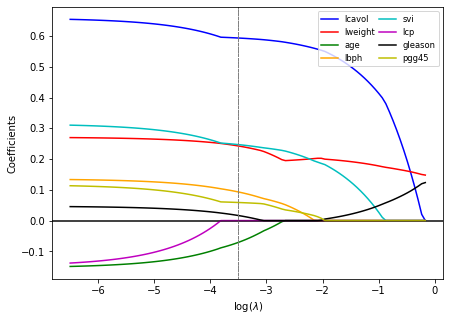

In [5]:
log_alphas = np.log(alphas_lasso)

names = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
color = ['b', 'r', 'g', 'orange', 'c', 'm', 'k', 'y']

plt.figure(figsize=(7, 5))
for coef_l, i, j in zip(coefs_lasso, color, names):
    plt.plot(log_alphas, coef_l, '-', color=i, label=j)
#    plt.ylim(-0.2,0.6)
    plt.axvline(-3.5, linestyle='--', color='gray',  linewidth=0.7)
    plt.axhline(0, linestyle='-', color='k',  linewidth=0.3)
    plt.legend(loc='upper right', title='', ncol=2, columnspacing=0.5, fontsize='small')
    plt.ylabel('Coefficients')
    plt.xlabel(r'$\log(\lambda)$')
plt.show()

# Lasso model selection (cross-validation)

In [6]:
model = LassoCV(cv=10, n_alphas=100, alphas=alphas, fit_intercept=False).fit(X, y)

print(model.alpha_) # also print(model.alphas_[np.argmin(model.mse_path_.mean(axis=1))])
print(model.alphas_)
print(model.coef_)

A = np.concatenate((alphas.reshape(100,1), log_alphas.reshape(100,1)),axis=1)
print(A)

0.0015085960000000007
[0.84342744 0.79121672 0.742238   0.69629121 0.65318867 0.61275431
 0.57482295 0.53923967 0.50585909 0.47454488 0.44516911 0.41761179
 0.39176035 0.36750919 0.34475926 0.32341761 0.30339708 0.28461588
 0.26699729 0.25046935 0.23496454 0.22041952 0.20677488 0.19397489
 0.18196725 0.17070293 0.1601359  0.150223   0.14092374 0.13220013
 0.12401654 0.11633954 0.10913777 0.10238181 0.09604406 0.09009865
 0.08452127 0.07928914 0.0743809  0.0697765  0.06545712 0.06140513
 0.05760396 0.0540381  0.05069298 0.04755493 0.04461114 0.04184957
 0.03925896 0.03682871 0.0345489  0.03241022 0.03040393 0.02852183
 0.02675624 0.02509995 0.02354619 0.02208861 0.02072125 0.01943855
 0.01823524 0.01710642 0.01604748 0.0150541  0.0141222  0.01324799
 0.0124279  0.01165858 0.01093688 0.01025985 0.00962474 0.00902893
 0.00847002 0.0079457  0.00745383 0.00699242 0.00655957 0.00615351
 0.00577259 0.00541525 0.00508003 0.00476556 0.00447056 0.00419382
 0.00393421 0.00369067 0.0034622  0.0032

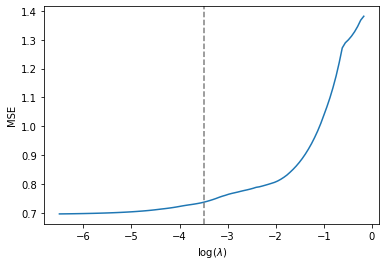

In [7]:
plt.plot(log_alphas, model.mse_path_.mean(axis=1))
plt.axvline(-3.5, linestyle='--', color='gray')
plt.ylabel('MSE')
plt.xlabel(r'$\log(\lambda)$')
plt.show()

# Lasso estimator

In [8]:
lasso = Lasso(alpha=np.exp(-3.5), fit_intercept=True)
lasso.fit(X,y)
print(lasso.coef_)

[ 0.59666155  0.23756529 -0.07465466  0.09653822  0.24640167 -0.
  0.00555068  0.06662755]


### Homework: apply and compare the lasso results with those obtained with the ridge regression

See:

* sklearn.linear_model.Ridge
* sklearn.linear_model.RidgeCV
* sklearn.linear_model.enet_path